In [1]:
#data manipulation
import pandas as pd

# dealing with arrays
import numpy as np

# for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# for Machine learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# for Model Evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#for Hyperparametere tuning
from sklearn.model_selection import GridSearchCV

# Save the model
import joblib
from joblib import dump
from joblib import load

# Ignore warning
import warnings
warnings.filterwarnings("ignore")

### Step 1: Load the Data

In [2]:
# Load train and test CSV files
df = pd.read_csv('train.csv')

df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0.0,1.0,2.0,0.8,106.0,6.0,...,1222.0,1890.0,668.0,13.0,4.0,19,1,1,0,0
1996,1965,1,2.6,1,0.0,0.0,39.0,0.2,187.0,4.0,...,915.0,1965.0,2032.0,11.0,10.0,16,1,1,1,2
1997,1911,0,0.9,1,1.0,1.0,36.0,0.7,108.0,8.0,...,868.0,1632.0,3057.0,9.0,1.0,5,1,1,0,3
1998,1512,0,0.9,0,4.0,1.0,46.0,0.1,145.0,5.0,...,336.0,670.0,869.0,18.0,10.0,19,1,1,1,0


A dataset with 2000 rows and 21 columns is generally considered small to medium-sized in the context of machine learning and data science. 

## Step 2: Data Preparation

In [3]:
# Check for missing values
print(df.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               5
four_g           5
int_memory       5
m_dep            5
mobile_wt        4
n_cores          4
pc               5
px_height        4
px_width         2
ram              2
sc_h             1
sc_w             1
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [4]:
# Remove rows with any missing values
df = df.dropna()

Here we could have filled the missing values by imputation ( like by mode value for binary variables that were categorical before preprocessing e.g. [four_g] , and by the mean value for numeric values e.g.[px_height ... ] but I chose to drop the rows containing missing values because they are just some values.

## Find Outliers:

In [5]:
# Select numerical columns for analysis
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate Z-score for each numerical column
z_scores = df[numerical_columns].apply(lambda x: (x - x.mean()) / x.std())

# Define threshold for Z-score (e.g., 3 standard deviations)
threshold = 3

# Find outliers
outliers = df[(z_scores > threshold).any(axis=1)]

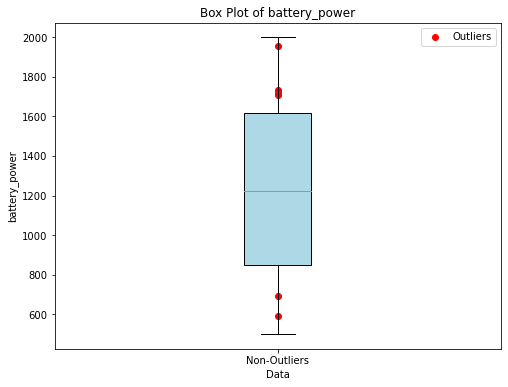

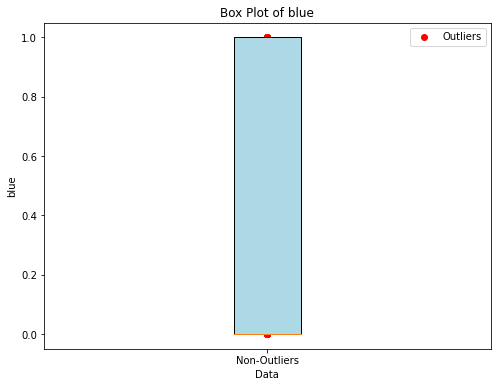

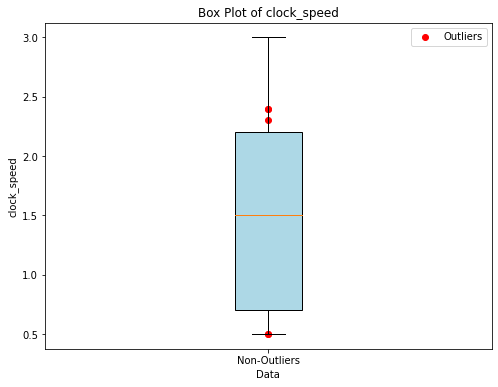

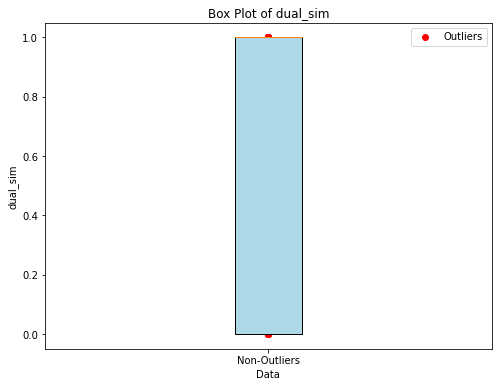

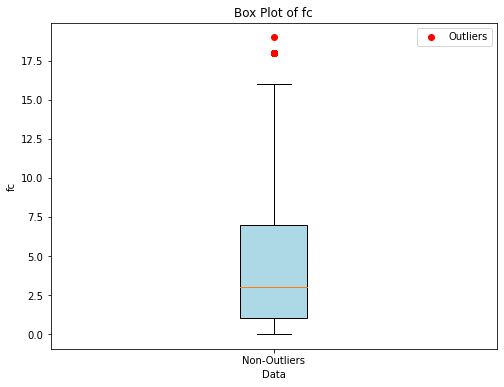

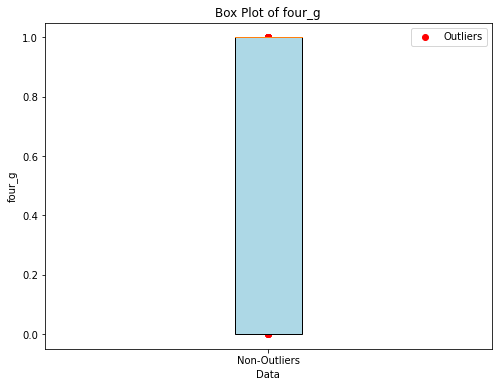

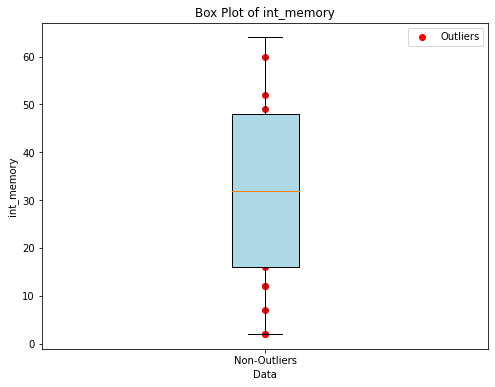

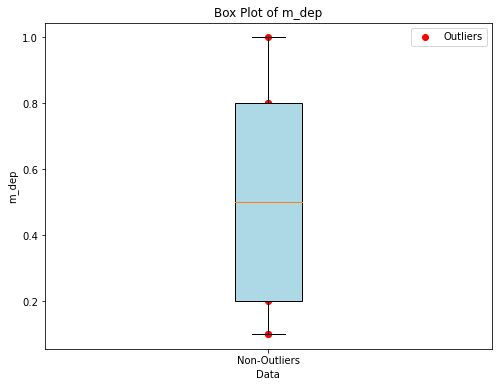

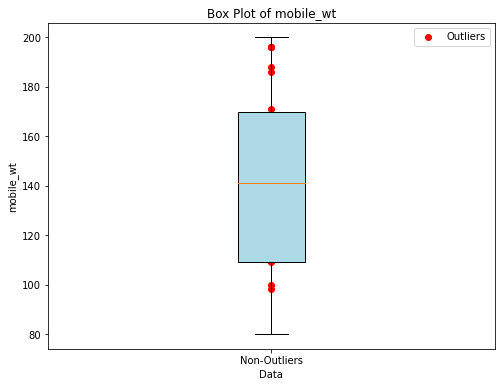

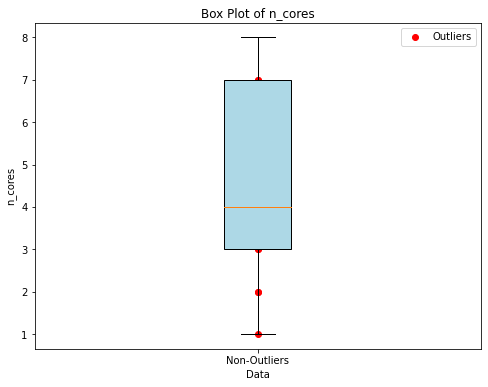

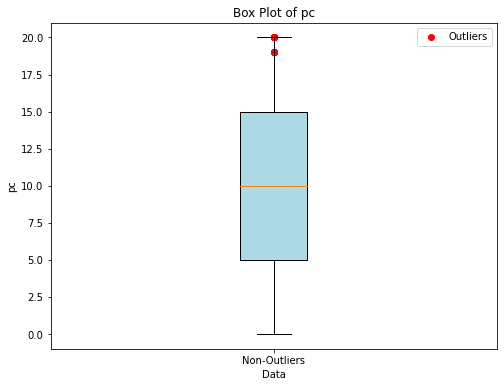

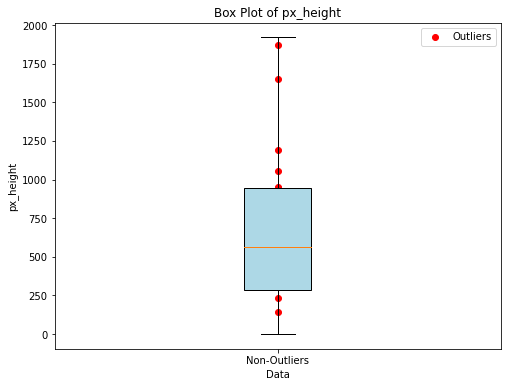

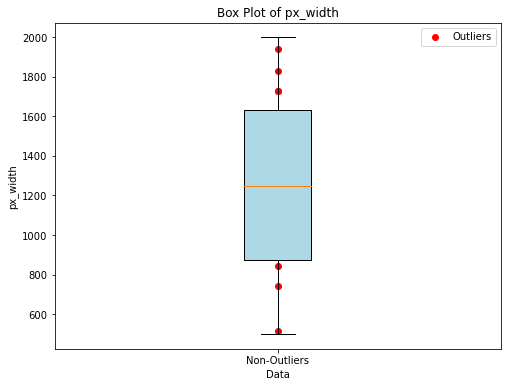

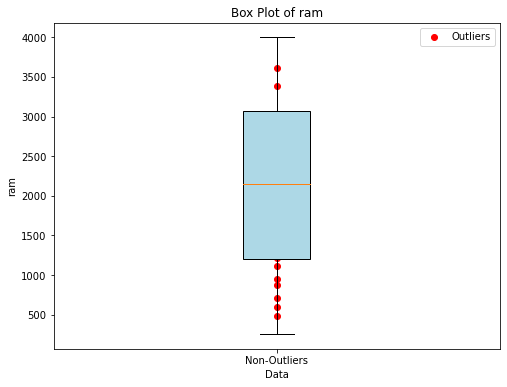

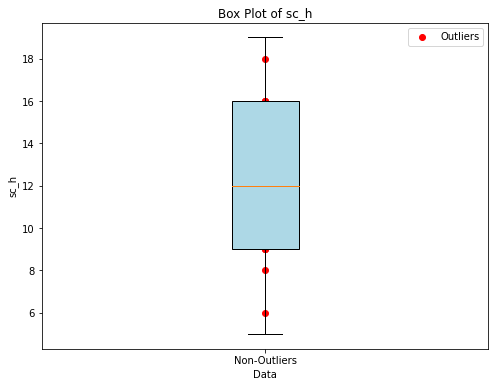

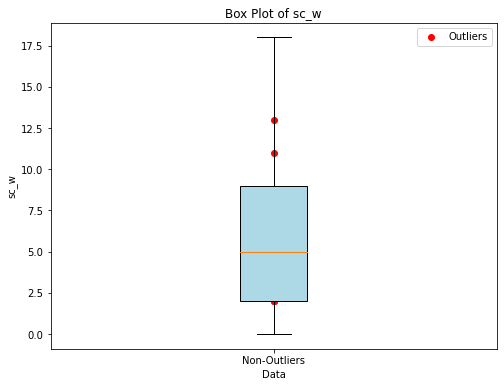

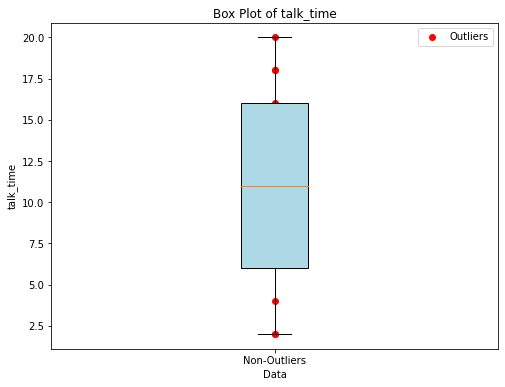

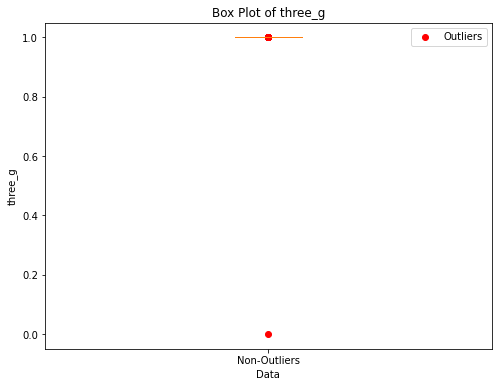

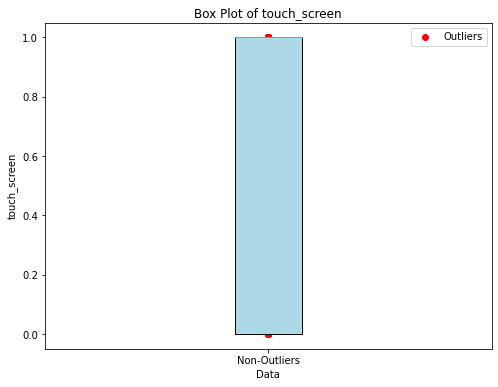

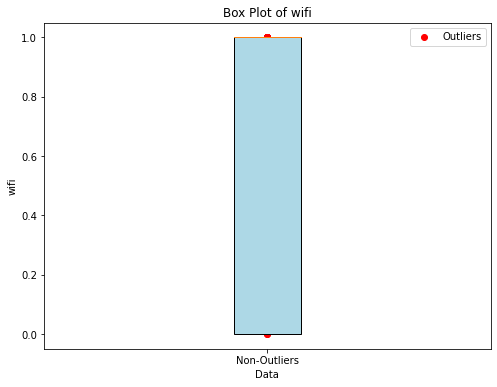

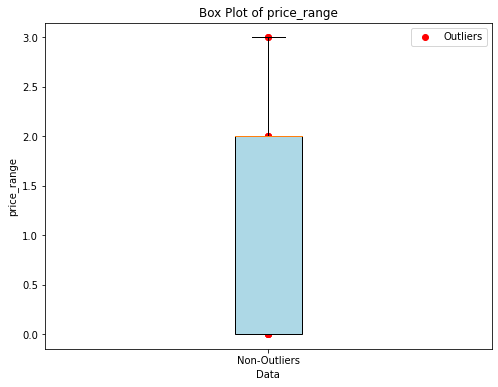

In [6]:
# Create box plot for each numerical column with outliers marked in red
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    
    # Plot box plot for non-outliers
    plt.boxplot(df[col], positions=[1], patch_artist=True, boxprops=dict(facecolor='lightblue'), showfliers=False)
    
    # Plot outliers
    plt.scatter(np.full_like(outliers[col].values, 1), outliers[col], color='red', label='Outliers')
    
    plt.xlabel('Data')
    plt.ylabel(col)
    plt.title(f'Box Plot of {col}')
    plt.xticks([1], ['Non-Outliers'])
    plt.legend()
    plt.show()

**Insight:**

Since the outliers in the dataset are not significantly distant from the rest of the values and do not heavily skew the distribution, there may be less need to remove them.

# Check for duplicate

In [7]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

if duplicate_rows.empty:
    print("No duplicate rows found.")
else:
    print("Duplicate rows found:")
    print(duplicate_rows)

No duplicate rows found.


## Some Exploratory Data Analysis (EDA)

In [8]:
# Overview of the dataset
print("\nOverview of the dataset:")
print(f"Total Samples: {len(df)}")
print(f"Number of Features: {len(df.columns)}")
print("\nData Types:")
print(df.dtypes)
print("\nSummary Statistics:")
df.describe()


Overview of the dataset:
Total Samples: 1991
Number of Features: 21

Data Types:
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc               float64
four_g           float64
int_memory       float64
m_dep            float64
mobile_wt        float64
n_cores          float64
pc               float64
px_height        float64
px_width         float64
ram              float64
sc_h             float64
sc_w             float64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

Summary Statistics:


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,...,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000
mean,1238.270718,0.496233,1.522451,0.510799,4.307885,0.520844,32.074335,0.502009,140.263184,4.516323,...,644.800603,1251.115520,2123.632848,12.307885,5.774485,11.001507,0.760924,0.501758,0.505274,1.499247
std,439.641057,0.500111,0.815499,0.500009,4.339735,0.499691,18.138177,0.288622,35.398777,2.291257,...,442.951035,431.924893,1085.051293,4.213061,4.357385,5.464872,0.426626,0.500123,0.500098,1.118539
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.500000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.500000,875.500000,1207.000000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.000000
50%,1225.000000,0.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2147.000000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,2.000000
75%,1615.500000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.500000,1633.000000,3065.000000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.000000
max,1998.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## Visualize the distribution of numerical variables:

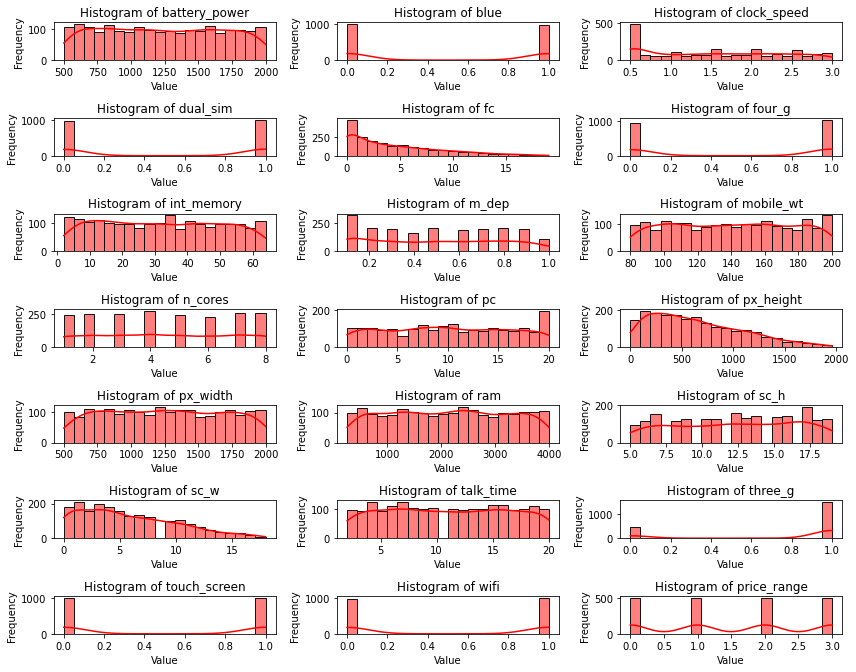

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(12, len(df.columns) // 2 + len(df.columns) % 2 * 3)) 

for i, col in enumerate(df.columns):
    plt.subplot(len(df.columns) // 2, 2 if len(df.columns) % 2 == 0 else 3, i + 1) 
    sns.histplot(data=df, x=col, bins=20, kde=True, color='red')  
    plt.title(f'Histogram of {col}')  
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout() 
plt.show()

**Insights from the Histograms:**

- We see varied scales and varied feature distributions e.g.(uniform distribution in battery_power, Right-skewed in clock_speed ...etc).

## Class Distribution

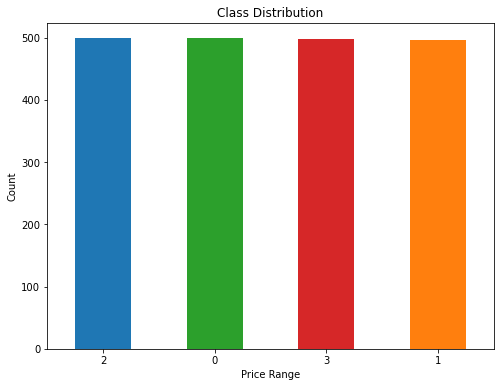

In [10]:
# Count the number of occurrences of each class label
class_distribution = df['price_range'].value_counts()

# Define darker colors for each class
colors = ['#1f77b4', '#2ca02c', '#d62728', '#ff7f0e']  # Blue, Green, Red, Orange

# Plot class distribution
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color=colors)
plt.title('Class Distribution')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

**Insight:**

    Equal class distribution signifies a balanced dataset.

## Feature Selection:

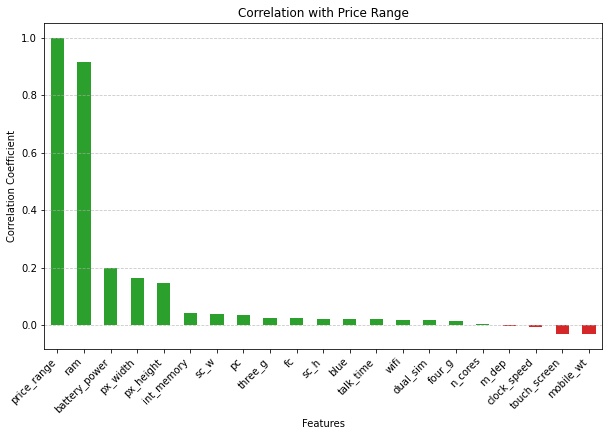

In [11]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Sort correlation coefficients with respect to price_range
price_range_correlation = correlation_matrix['price_range'].sort_values(ascending=False)

# Define colors for positive and negative correlations
colors = ['#2ca02c' if c > 0 else '#d62728' for c in price_range_correlation]

# Plot correlation coefficients
plt.figure(figsize=(10, 6))
price_range_correlation.plot(kind='bar', color=colors)
plt.title('Correlation with Price Range')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [12]:
# Extract and enumerate feature names and correlation values
sorted_correlation_list = [(f"{feature}: {correlation:.16f}") for feature, correlation in zip(price_range_correlation.index, price_range_correlation)]

# Display sorted list of correlation values
for i, correlation_value in enumerate(sorted_correlation_list, start=1):
    print(f"{i}. {correlation_value}")

1. price_range: 1.0000000000000000
2. ram: 0.9174475832238123
3. battery_power: 0.1992766192997139
4. px_width: 0.1633192496523258
5. px_height: 0.1479562601192928
6. int_memory: 0.0418122156851929
7. sc_w: 0.0383708520561943
8. pc: 0.0347162819355084
9. three_g: 0.0248955086276061
10. fc: 0.0247377966117207
11. sc_h: 0.0216427436139399
12. blue: 0.0213299185340658
13. talk_time: 0.0205111594026071
14. wifi: 0.0195460020674620
15. dual_sim: 0.0191076709603270
16. four_g: 0.0155370956705473
17. n_cores: 0.0046615783704509
18. m_dep: -0.0013962158506880
19. clock_speed: -0.0066748757118917
20. touch_screen: -0.0303151081935778
21. mobile_wt: -0.0321675331879673


# Insights:
    
    - RAM: Has the highest positive correlation with price range, nearly reaching 1.
        
    - Battery power, px width, and px height: Also positively correlated but significantly lower than RAM.
        
    - Features like four_g, three_g, and others show minimal to no correlation with price range.
    
    - Dual Sim: This feature shows a negative correlation with the price range. Devices with dual SIM capability tend to have a lower price range.
        
    - Mobile Weight (Mobile Wt): Heavier mobile phones are negatively correlated with price. Lighter devices are often associated with higher price ranges.
        
    - Clock Speed: The clock speed of the processor also exhibits a negative correlation. Higher clock speeds don’t necessarily translate to higher prices.

In [13]:
selected_features =['ram','battery_power','px_height','px_width','int_memory','sc_w','pc','touch_screen','mobile_wt']

## Model Selection:

We have a multi-class classification problem where the model should predict the right class of price range for a device, so we can apply any model can achieve classification tasks like tree-based models and linear models, especially with medium-sized datasets. Still, we should pay attention to some considerations:


- **Tree-Based Models:** Algorithms like Decision Trees, Random Forests, and Gradient Boosting Machines handle varied feature distributions and scaling internally. They are less sensitive to the scaling of features.


- **Linear Models:** Algorithms like Linear Regression, Logistic Regression, and Support Vector Machines (SVM) require feature scaling. The histograms suggest the need for standardization or normalization before applying these models.


- Since we intend to make a try for linear models so we should apply feature scaling using MinMaxScaler that does not make any assumptions about the distribution of data. It scales features to a fixed range, typically 0 to 1, which is useful for the varied ranges.


- Of course, we will also try the decision tree model.

In [15]:
# Extract the features (X) and target variable (y)
X = df[selected_features]
y = df['price_range']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the features and transform them
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display the first few rows of the scaled features
print(X_scaled_df.head())

# Save the scaler to a file
scaler_filename = "scaler.pkl"
joblib.dump(scaler, scaler_filename)

        ram  battery_power  px_height  px_width  int_memory      sc_w    pc  \
0  0.612774       0.227789   0.010204  0.170895    0.080645  0.388889  0.10   
1  0.634687       0.347361   0.461735  0.993324    0.822581  0.166667  0.30   
2  0.627205       0.041416   0.644388  0.811749    0.629032  0.111111  0.30   
3  0.671566       0.076152   0.620408  0.858478    0.129032  0.444444  0.45   
4  0.308658       0.881764   0.616327  0.475300    0.677419  0.111111  0.70   

   touch_screen  mobile_wt  
0           0.0   0.900000  
1           1.0   0.466667  
2           1.0   0.541667  
3           0.0   0.425000  
4           1.0   0.508333  


['scaler.pkl']

In [16]:
# Split the scaled features and target variable into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

## Machine Learning Model:

In [17]:
# Define a list of classifiers
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    SVC(),
]

best_accuracy = 0
best_model = None

# Iterate over each classifier
for clf in classifiers:
    # Train the model on the training set
    clf.fit(X_train, y_train)
    
    # Make predictions on the testing set
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the model name and accuracy
    print(f"Model: {clf.__class__.__name__}, Accuracy: {accuracy}")
    
    # Check if current model has higher accuracy than the best model so far
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_clf = clf

# Print the best model and its accuracy
print(f"Best Model: {best_clf.__class__.__name__}, Accuracy: {best_accuracy}")

Model: LogisticRegression, Accuracy: 0.9523809523809523
Model: DecisionTreeClassifier, Accuracy: 0.8471177944862155
Model: SVC, Accuracy: 0.9047619047619048
Best Model: LogisticRegression, Accuracy: 0.9523809523809523


## Evaluation:

### Classification Report for LogisticRegression :

In [18]:
class_labels = ['low cost', 'medium cost', 'high cost', 'very high cost']

# Predict the price range on the testing set
y_pred = best_clf.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_labels))

Classification Report:
                precision    recall  f1-score   support

      low cost       0.95      1.00      0.98       106
   medium cost       0.94      0.93      0.94        89
     high cost       0.97      0.90      0.93       107
very high cost       0.94      0.98      0.96        97

      accuracy                           0.95       399
     macro avg       0.95      0.95      0.95       399
  weighted avg       0.95      0.95      0.95       399



### Confusion Matrix for LogisticRegression:

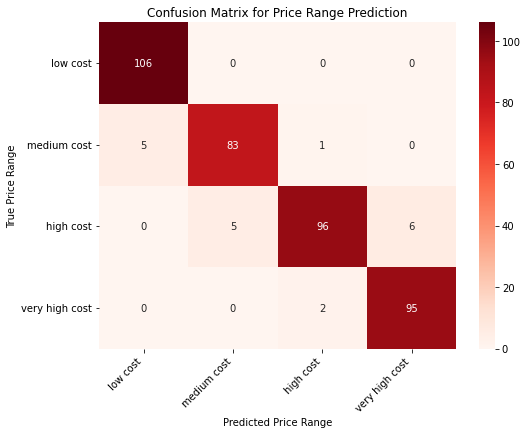

In [19]:
# Predict the price range on the testing set
y_pred = best_clf.predict(X_test)

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix with Seaborn heatmap
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')

# Adjust spacing between axis titles and class labels
heatmap.set_xticklabels(class_labels, rotation=45, ha='right')
heatmap.set_yticklabels(class_labels, rotation=0)

plt.title('Confusion Matrix for Price Range Prediction')
plt.xlabel('Predicted Price Range')
plt.ylabel('True Price Range')
plt.show()

## Hyperparameter Tuning for LogisticRegression:

In [20]:
# Define the hyperparameters to tune
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Penalty type
    'solver': ['liblinear', 'lbfgs', 'saga']  # Solver algorithm
}

# Create a logistic regression classifier
log_reg = LogisticRegression(max_iter=1000)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model
accuracy = best_model.score(X_test, y_test)

print("Accuracy: {:.3f}".format(accuracy))

Best Hyperparameters: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
Accuracy: 0.982


## Hyperparameter Tuning for DecisionTree:

In [21]:
# Define the hyperparameters to tune for Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],  # Criterion to measure the quality of a split
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Create a Decision Tree classifier
dt = DecisionTreeClassifier()

# Perform grid search with 5-fold cross-validation
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search_dt.fit(X_train, y_train)

# Get the best hyperparameters
best_params_dt = grid_search_dt.best_params_
print("Best Hyperparameters for Decision Tree:", best_params_dt)

# Get the best model
best_model_dt = grid_search_dt.best_estimator_

# Evaluate the best model
accuracy_dt = best_model_dt.score(X_test, y_test)

print("Accuracy for Decision Tree: {:.3f}".format(accuracy_dt))

Best Hyperparameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 40, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy for Decision Tree: 0.845


## Hyperparameter Tuning for SVC:

In [22]:
# Define the hyperparameters to tune for SVC
param_grid_svc = {
    'C': [0.1, 1, 10, 100, 1000],  # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],  # Kernel coefficient
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']  # Kernel type
}

# Create an SVC classifier
svc = SVC(max_iter=1000)

# Perform grid search with 5-fold cross-validation
grid_search_svc = GridSearchCV(estimator=svc, param_grid=param_grid_svc, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search_svc.fit(X_train, y_train)

# Get the best hyperparameters
best_params_svc = grid_search_svc.best_params_
print("Best Hyperparameters for SVC:", best_params_svc)

# Get the best model
best_model_svc = grid_search_svc.best_estimator_

# Evaluate the best model
accuracy_svc = best_model_svc.score(X_test, y_test)

print("Accuracy for SVC: {:.3f}".format(accuracy_svc))

Best Hyperparameters for SVC: {'C': 100, 'gamma': 1, 'kernel': 'linear'}
Accuracy for SVC: 0.977


**Result:**

We note that even after hyperparameter tuning of these models, Logistics Regeration remained superior with 0.982 as test accuracy model.

## Classification Report for tuned logistic regression:

In [23]:
# Predict the price range on the testing set
y_pred = best_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_labels))

Classification Report:
                precision    recall  f1-score   support

      low cost       1.00      0.99      1.00       106
   medium cost       0.97      0.98      0.97        89
     high cost       0.97      0.97      0.97       107
very high cost       0.99      0.99      0.99        97

      accuracy                           0.98       399
     macro avg       0.98      0.98      0.98       399
  weighted avg       0.98      0.98      0.98       399



## Confusion Matrix for tuned Logistic Regression:

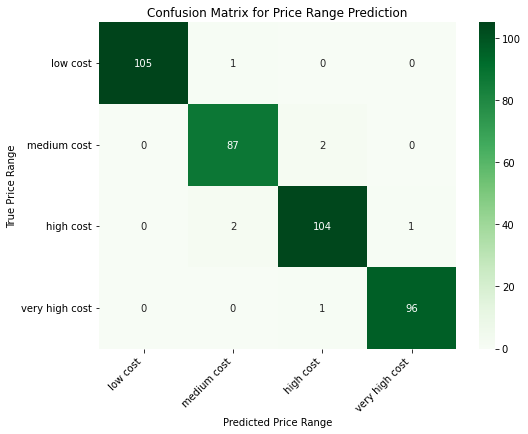

In [24]:
# Predict the price range on the testing set
y_pred = best_model.predict(X_test)

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix with Seaborn heatmap
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')

# Adjust spacing between axis titles and class labels
heatmap.set_xticklabels(class_labels, rotation=45, ha='right')
heatmap.set_yticklabels(class_labels, rotation=0)

plt.title('Confusion Matrix for Price Range Prediction')
plt.xlabel('Predicted Price Range')
plt.ylabel('True Price Range')
plt.show()

In [25]:
# Save the trained model to a file
dump(best_model, 'best_model.joblib')

['best_model.joblib']

## Deployment

In [26]:
# Load the saved model from file
loaded_model = load('best_model.joblib')

In [27]:
# Load train and test CSV files
df2 = pd.read_csv('test.csv')

df2

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [28]:
# Check for missing values
print(df2.isnull().sum())

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64


In [29]:
X2 = df2[selected_features]

In [30]:
X2

,ram,battery_power,px_height,px_width,int_memory,sc_w,pc,touch_screen,mobile_wt
0,3476,1043,226,1412,5,7,16,1,193
1,3895,841,746,857,61,0,12,0,191
2,2396,1807,1270,1366,27,10,4,1,186
3,3893,1546,295,1752,25,0,20,1,96
4,1773,1434,749,810,49,8,18,0,108
...,...,...,...,...,...,...,...,...,...
995,2121,1700,644,913,54,8,17,1,170
996,1933,609,1152,1632,13,1,2,1,186
997,1223,1185,477,825,8,0,12,0,80
998,2509,1533,38,832,50,11,12,1,171


In [31]:
# Apply the same scaler used for training to the new data (df2)
Scaled_df2 = scaler.transform(X2)

## Apply Prediction using the loaded model:

In [32]:
# Use the loaded model to predict price range
predicted_price_range = loaded_model.predict(Scaled_df2)

In [33]:
predicted_price_mapping = {0: 'low cost', 1: 'medium cost', 2: 'high cost', 3: 'very high cost'}

# Map predicted values using custom mapping
predicted_price_labels = [predicted_price_mapping[label] for label in predicted_price_range]

# Update 'Price Range' column in X2 DataFrame
X2['Price Range'] = predicted_price_labels

# Display X2 DataFrame with predicted price range labels
X2.head(10)

,ram,battery_power,px_height,px_width,int_memory,sc_w,pc,touch_screen,mobile_wt,Price Range
0,3476,1043,226,1412,5,7,16,1,193,very high cost
1,3895,841,746,857,61,0,12,0,191,very high cost
2,2396,1807,1270,1366,27,10,4,1,186,high cost
3,3893,1546,295,1752,25,0,20,1,96,very high cost
4,1773,1434,749,810,49,8,18,0,108,medium cost
5,3506,1464,569,939,50,7,9,1,198,very high cost
6,3873,1718,1283,1374,47,2,3,0,156,very high cost
7,1495,833,1312,1880,62,2,2,1,111,medium cost
8,3485,1111,556,876,25,9,19,1,101,very high cost
9,651,1520,52,1009,25,0,20,0,171,low cost


## Show the results:

In [34]:
df2['Price Range'] = predicted_price_labels

df2

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,Price Range
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,226,1412,3476,12,7,2,0,1,0,very high cost
1,2,841,1,0.5,1,4,1,61,0.8,191,...,746,857,3895,6,0,7,1,0,0,very high cost
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,1270,1366,2396,17,10,10,0,1,1,high cost
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,295,1752,3893,10,0,7,1,1,0,very high cost
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,749,810,1773,15,8,7,1,0,1,medium cost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,644,913,2121,14,8,15,1,1,0,high cost
996,997,609,0,1.8,1,0,0,13,0.9,186,...,1152,1632,1933,8,1,19,0,1,1,medium cost
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,477,825,1223,5,0,14,1,0,0,low cost
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,38,832,2509,15,11,6,0,1,0,high cost


## Predict for new example:

In [35]:
import numpy as np

def predict_price_range_with_input():
    def predict_price_range(ram, battery_power, px_height, px_width, int_memory, sc_w, pc, touch_screen, mobile_wt):
        
        # Create a NumPy array with user input
        input_data = np.array([[ram, battery_power, px_height, px_width, int_memory, sc_w, pc, touch_screen, mobile_wt]])
        
        # Apply the same scaler used for training to the new data
        scaled_input = scaler.transform(input_data)

        # Use the loaded model to predict price range
        predicted_price_range = loaded_model.predict(scaled_input)

        # Map predicted values using custom mapping
        predicted_price_label = [predicted_price_mapping[label] for label in predicted_price_range]

        return predicted_price_label[0]

    # Prompt the user to input values
    ram = int(input("Enter RAM value: "))
    battery_power = int(input("Enter Battery Power value: "))
    px_height = int(input("Enter Pixel Height value: "))
    px_width = int(input("Enter Pixel Width value: "))
    int_memory = int(input("Enter Internal Memory value: "))
    sc_w = int(input("Enter Screen Width value: "))
    pc = int(input("Enter Primary Camera value: "))
    touch_screen = input("Enter Touch Screen: ")
    mobile_wt = int(input("Enter Mobile Weight value: "))

    # Call the function to predict the price range
    predicted_price_range = predict_price_range(ram, battery_power, px_height, px_width, int_memory, sc_w, pc, touch_screen, mobile_wt)

    # Print the predicted price range in bold big font
    print("\033[1m\033[4mThe predicted price range is:", predicted_price_range.upper(),"\033[0m")

In [36]:
# Call the function to predict price range with user input
predict_price_range_with_input()

# An example to try:
#2828,1270,457,608,35,2,19,0,140

Enter RAM value: 2828
Enter Battery Power value: 1270
Enter Pixel Height value: 457
Enter Pixel Width value: 608
Enter Internal Memory value: 35
Enter Screen Width value: 2
Enter Primary Camera value: 19
Enter Touch Screen: 0
Enter Mobile Weight value: 140
The predicted price range is: HIGH COST 


In [37]:
# Call the function to predict price range with user input
predict_price_range_with_input()

# An example to try:
#1933,609,1152,1632,13,1,2,1,186

Enter RAM value: 1933
Enter Battery Power value: 609
Enter Pixel Height value: 1152
Enter Pixel Width value: 1632
Enter Internal Memory value: 13
Enter Screen Width value: 1
Enter Primary Camera value: 2
Enter Touch Screen: 1
Enter Mobile Weight value: 186
The predicted price range is: MEDIUM COST 


In [38]:
# Call the function to predict price range with user input
predict_price_range_with_input()

# An example to try:
#1223,1185,477,825,8,0,12,0,80

Enter RAM value: 1223
Enter Battery Power value: 1185
Enter Pixel Height value: 477
Enter Pixel Width value: 825
Enter Internal Memory value: 8
Enter Screen Width value: 0
Enter Primary Camera value: 12
Enter Touch Screen: 0
Enter Mobile Weight value: 80
The predicted price range is: LOW COST 


In [39]:
# Call the function to predict price range with user input
predict_price_range_with_input()

# An example to try:
#3895,841,746,857,61,0,12,0,191

Enter RAM value: 3895
Enter Battery Power value: 841
Enter Pixel Height value: 746
Enter Pixel Width value: 857
Enter Internal Memory value: 61
Enter Screen Width value: 0
Enter Primary Camera value: 12
Enter Touch Screen: 0
Enter Mobile Weight value: 191
The predicted price range is: VERY HIGH COST 


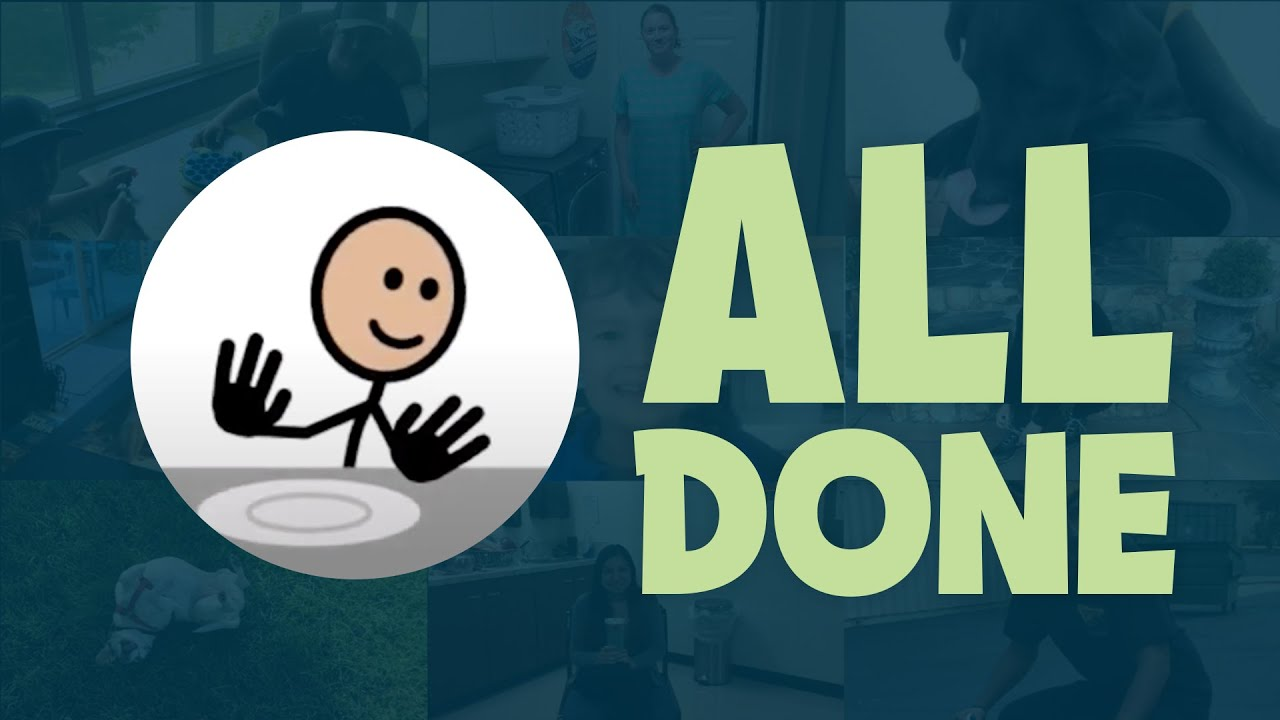